## Plotting regular waves per probe per file

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
def plot_period(frequency, amplitude,shift,next):
    data_list = [["time"],["Probe 1"],["Probe 2"],["Probe 3"], ["Probe 4"], ["Probe 5"]]
    freq = str(frequency).replace(".","")
    filename = "F" + freq + "A" + str(amplitude)
    with open('Experimental Data-20201218/' + filename + ".txt") as txt:
        rows = txt.readlines()
        time_period = int(len(rows)/2)
        current = 0
        zeroes = 0
        while zeroes < 3 and time_period < len(rows):
            last = current
            row_list = rows[time_period].strip().split(" ")
            current = float(rows[time_period].strip().split(" ")[3])
            if current == 0 or (current > 0 and last < 0) or (current < 0 and last > 0):
                if not next:
                    zeroes += 1
                else:
                    next = False
            for i in range(len(data_list)-1):
                if zeroes > 0:
                    data_list[i].append(float(row_list[i]))
            time_period += 1
    sine_list = ["Sine wave of same frequency and amplitude\ntime shifted in order to be in phase"]
    for i in range(1,len(data_list[0])):
        sine_list.append(amplitude *(np.sin(2*np.pi*frequency*(float(data_list[0][i]) - shift))))
    plt.figure(figsize=(6,4))
    plt.title("Regular Waves Plot: Frequency: " + str(frequency) + "Hz, Amplitude: " + str(amplitude) + "cm")
    plt.xlabel("time/sec")
    plt.ylabel("wave height/cm")
    plt.plot(data_list[0][1:],sine_list[1:],label=sine_list[0])
    plt.plot(data_list[0][1:],data_list[3][1:],label=data_list[3][0])
    plt.legend()
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.savefig("graphs/" + filename + "Probe3.png")
    plt.show()

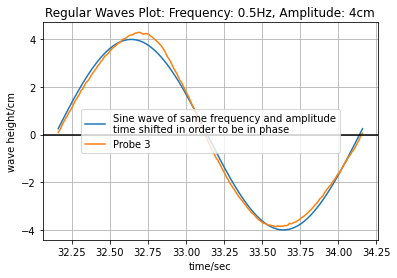

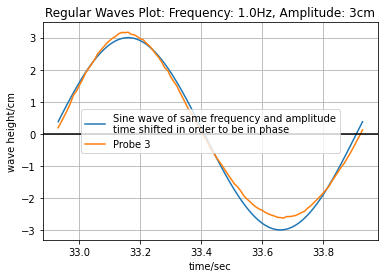

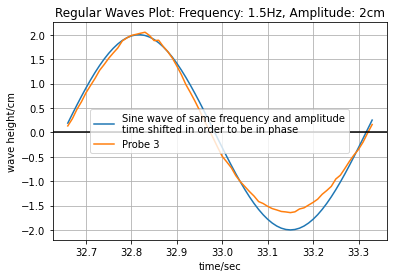

In [39]:
plot_period(0.5,4,0.14,False)
plot_period(1.0,3,0.91,True)
plot_period(1.5,2,0.65,True)
